# Value Iteration - Gambler's Problem

Implement value iteration for the gambler’s problem and solve it for $p_h = 0.25$ and $p_h = 0.55$. 

In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \rightarrow 0$? 

## Value Iteration algorithm

**Algorithm parameter:** a small threshold $\theta > 0$ determining accuracy of estimation  
**Initialize** $V(s)$, for all $s \in \mathcal{S}^+$, arbitrarily except that $V(\text{terminal}) = 0$

```python
while True:
    delta = 0
    for s in S:
        v = V[s]
        V[s] = max_a sum_{s', r} p(s', r | s, a) [r + γ * V[s']]
        delta = max(delta, abs(v - V[s]))
    if delta < theta:
        break
```

Output policy $\pi \approx \pi_* - \text{argmax}_a \sum_{s', r} p(s', r | s, a) [r + \gamma V[s']]$


In [1]:
import numpy as np

In [291]:
S = np.arange(0, 101)
V = np.zeros_like(S, dtype=float)
V[100] = 1  # terminal state
V[0] = 0  # terminal state
p_h = 0.4


def calc_G_expected(s, V):
    valid_actions = np.arange(1, min(s, 100 - s) + 1)

    s_heads = s + valid_actions
    G_heads = V[s_heads]
    # add 1 reward if hit 100 dollars

    s_tails = s - valid_actions
    G_tails = V[s_tails]

    G_expected = p_h * G_heads + (1 - p_h) * G_tails
    return G_expected


theta = 1e-25
V_history = []
while True:
    delta = 0
    V_history.append(V.copy())
    for s in S[1:100]:
        v = V[s]
        # take action
        V[s] = np.max(calc_G_expected(s, V))
        delta = max(delta, abs(v - V[s]))

    if delta < theta:
        break

print(f"{len(V_history)} total sweeps")

33 total sweeps


In [292]:
# create policy
policy = np.zeros(shape=(101))
for s in S[1:100]:
    # rounding the policy here to account for floating point weirdness
    policy[s] = np.argmax(calc_G_expected(s, V).round(5)) + 1

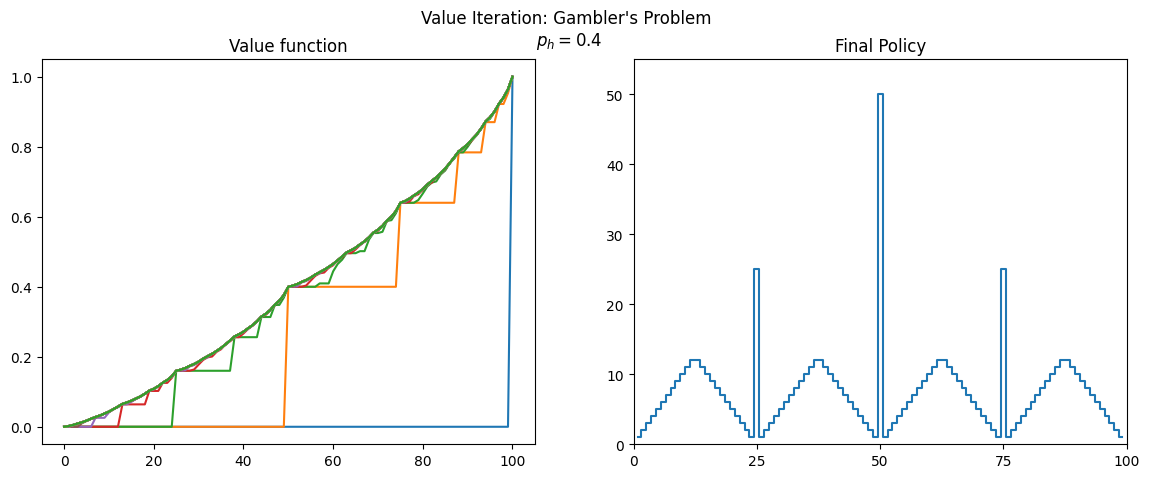

In [294]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1
axs: list[plt.Axes]
axs[0].plot(np.arange(0, 101), np.array(V_history).T)
axs[0].set_title("Value function")

# Plot 2
axs[1].step(S[1:100], policy[1:100], where="mid")
axs[1].set_xticks(np.arange(0, 101, 25))
axs[1].set_xlim(0, 100)
if p_h > 0.5:
    axs[1].set_ylim(0, 2)
else:
    axs[1].set_ylim(0, 55)
axs[1].set_title("Final Policy")

# Give the overall figure a title
fig.suptitle(f"Value Iteration: Gambler's Problem\n $p_h = {p_h}$")
plt.show()